#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


In [ ]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import datetime

# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
data = pd.read_csv('/content/rrhh.csv')
data.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
#dummies
data = pd.get_dummies(data=data, columns=['Posicion', 'Educacion'])
data.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,1,0,0,1,0,0
1,5.6,2,0,31240,1,0,0,0,1,0
2,11.7,1,0,63880,1,0,0,0,1,0
3,5.2,2,1,29960,1,0,0,0,1,0
4,7.2,2,1,34710,0,1,0,0,1,0


In [ ]:
data.loc[5:10]

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
5,7.2,2,1,32210,1,0,0,1,0,0
6,1.3,1,1,15370,1,0,0,1,0,0
7,8.1,1,0,22930,1,0,0,1,0,0
8,5.6,1,0,38830,1,0,0,0,1,0
9,6.2,1,0,33300,0,1,0,0,0,1
10,9.8,0,0,26970,1,0,0,0,1,0


In [ ]:
#Definir nuestra variable target o dependiente

y = np.array(data['Salario'])
y

array([13540, 31240, 63880, 29960, 34710, 32210, 15370, 22930, 38830,
       33300, 26970, 35140, 32130, 21390, 37360, 44950, 13120, 37760,
       27820, 27430, 17680, 83470, 37060, 27850, 57690, 29050, 45160,
       27860, 33810, 30760, 16840, 33610, 31140, 34720, 43860, 36400,
       28030, 35590, 33130, 24300, 18570, 24710, 32400, 19330, 18710,
       53600, 25660, 52830, 31020, 43400, 27690, 24770, 30190, 32640,
       39950, 21960, 20030, 28290,  7850, 41760, 31470, 27470, 41040,
       43270, 15010, 42280, 20470, 32150, 29670, 42010, 17740, 15750,
       54540, 45090, 29680, 42810, 19240, 27490, 31230, 42040, 23030,
       60730, 38490, 21880, 30670, 12950, 29510, 18640, 17160, 12090,
       46360, 25210, 27910, 43300, 44160, 23420, 22220, 29530, 43030,
       25530, 44740, 20040, 22170, 40710, 28590, 24170, 37240, 53200,
       23590, 20800, 28840, 56940, 15560, 29580, 49130, 19610, 26330,
       25210, 54790, 41050, 40750, 34150, 38360, 28380, 42280, 23290,
       31570, 28280,

In [ ]:
# Variables independientes
X = data.loc[:, ['Experiencia', 'Hijos', 'Casado', 'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente', 'Educacion_Bachillerato', 'Educacion_Licenciatura', 'Educacion_Posgrado'  ]]
X

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,1,0,0,1,0,0
1,5.6,2,0,1,0,0,0,1,0
2,11.7,1,0,1,0,0,0,1,0
3,5.2,2,1,1,0,0,0,1,0
4,7.2,2,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
995,6.0,2,1,1,0,0,1,0,0
996,6.9,1,0,1,0,0,0,1,0
997,11.4,0,0,1,0,0,0,1,0
998,9.9,2,1,1,0,0,1,0,0


In [ ]:
X.shape, y.shape

((1000, 9), (1000,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
escalador = MinMaxScaler()
transformados = escalador.fit_transform(X)
transformados

array([[0.02649007, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.36423841, 0.5       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76821192, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.74834437, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.64900662, 0.5       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66887417, 0.75      , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
transformado = pd.DataFrame(transformados)
transformado.columns = X.columns
transformado.describe()

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.418291,0.363250,0.595000,0.790000,0.151000,0.059000,0.531000,0.369000,0.10000
std,0.170703,0.302206,0.491138,0.407512,0.358228,0.235743,0.499288,0.482775,0.30015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.298013,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.417219,0.250000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
75%,0.529801,0.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
X.head()

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,1,0,0,1,0,0
1,5.6,2,0,1,0,0,0,1,0
2,11.7,1,0,1,0,0,0,1,0
3,5.2,2,1,1,0,0,0,1,0
4,7.2,2,1,0,1,0,0,1,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experiencia             1000 non-null   float64
 1   Hijos                   1000 non-null   int64  
 2   Casado                  1000 non-null   int64  
 3   Posicion_Analista       1000 non-null   uint8  
 4   Posicion_Coordinador    1000 non-null   uint8  
 5   Posicion_Gerente        1000 non-null   uint8  
 6   Educacion_Bachillerato  1000 non-null   uint8  
 7   Educacion_Licenciatura  1000 non-null   uint8  
 8   Educacion_Posgrado      1000 non-null   uint8  
dtypes: float64(1), int64(2), uint8(6)
memory usage: 29.4 KB


In [ ]:
#Se esplitea dataframe

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

X_train

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
687,7.9,3,1,1,0,0,1,0,0
500,4.0,0,1,1,0,0,1,0,0
332,7.2,1,1,0,1,0,0,1,0
979,7.3,1,1,1,0,0,1,0,0
817,9.7,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
835,3.5,0,1,0,0,1,1,0,0
192,7.0,0,0,1,0,0,1,0,0
629,8.0,2,1,1,0,0,0,1,0
559,5.2,1,0,0,1,0,0,1,0


In [ ]:
preg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predecida = reg.predict(X_test)
y_predecida

array([29006.02445267, 26437.30962427, 25925.60922842, 24084.22275507,
       34472.84413741, 27892.79278344, 25486.66768992, 31212.7671581 ,
       32220.5924734 , 13948.02198514, 32224.61557873, 22068.69417577,
       23873.28799591, 36224.39973323, 33476.02314977, 18268.29240936,
       37618.67640612, 20211.06213131, 31855.78428473, 20421.99689047,
       26078.65620886, 33835.34665989, 21076.56638817, 28156.76576692,
       23502.41211472, 44024.58565414, 41601.38854044, 37507.75040308,
       20373.65186619, 28668.46616277, 34383.01325988, 36114.84822267,
       29708.93897465, 28084.00690957, 32716.59534155, 24822.55543778,
       31038.62505215, 59245.75515978, 38220.2076795 , 26721.00324078,
       39496.60638685, 30562.89086044, 42251.2648381 , 31111.3839095 ,
       27128.67177518, 31038.62505215, 22532.04954734, 15308.98106674,
       14850.31889521, 25624.84359173, 46108.17989075, 23982.83950647,
       46368.69969918, 18950.11180583, 29835.56250539, 28722.33083616,
      

In [ ]:
resultados = pd.DataFrame({
    'Realidad': y_test,
    'Prediccion': y_predecida
})

resultados

,Realidad,Prediccion
0,18250,29006.024453
1,21060,26437.309624
2,23280,25925.609228
3,30950,24084.222755
4,27290,34472.844137
...,...,...
195,32150,33745.515782
196,42000,34046.281419
197,20610,24795.305539
198,32220,35069.682211


In [ ]:
# Error cuadrático medio
mse = np.mean ( (y_predecida - y_test) **2)
mse

38056866.38010447

In [ ]:
#Coeficiente de determinación R2
r2 = reg.score(X_test, y_test)
r2

0.6904817835453876

In [ ]:
#Calcular Error Absoluto Medio
mae = np.mean(np.abs(y_test - y_predecida))
mae

4895.84057439243

Se presenta sesgo al no contar con mayor información, para poder completar con mayor exactitud en este caso se podría pedir al equipo de RHH más datos con los cuales se pueda trabajar mejor


## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


In [ ]:
df_contratado = pd.read_csv('/content/rrhh_2.csv')
df_contratado.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
#dummies
df_contratado = pd.get_dummies(data=df_contratado, columns=['Posicion', 'Educacion'])
df_contratado.head()

,Experiencia,Hijos,Casado,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,1,1,0,0,1,0,0
1,5.6,2,0,31240,0,1,0,0,0,1,0
2,11.7,1,0,63880,0,1,0,0,0,1,0
3,5.2,2,1,29960,1,1,0,0,0,1,0
4,7.2,2,1,34710,1,0,1,0,0,1,0


In [ ]:
# Variables independientes

caracteristicas = [
    'Experiencia','Hijos', 'Casado', 'Salario', 'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente',
    'Educacion_Bachillerato', 'Educacion_Licenciatura', 'Educacion_Posgrado'  ]

In [ ]:
X = df_contratado[caracteristicas]
y = df_contratado.Contratado

X

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,1,0,0,1,0,0
1,5.6,2,0,31240,1,0,0,0,1,0
2,11.7,1,0,63880,1,0,0,0,1,0
3,5.2,2,1,29960,1,0,0,0,1,0
4,7.2,2,1,34710,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,6.0,2,1,21820,1,0,0,1,0,0
996,6.9,1,0,34010,1,0,0,0,1,0
997,11.4,0,0,38840,1,0,0,0,1,0
998,9.9,2,1,45660,1,0,0,1,0,0


In [ ]:
 # Se estandarizan
escalador = MinMaxScaler()
transformados = escalador.fit_transform(X)
transformados

array([[0.02649007, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.36423841, 0.5       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76821192, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.74834437, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.64900662, 0.5       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66887417, 0.75      , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
transformado = pd.DataFrame(transformados)
transformado.columns = X.columns
transformado.describe()

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.418291,0.363250,0.595000,0.323189,0.790000,0.151000,0.059000,0.531000,0.369000,0.10000
std,0.170703,0.302206,0.491138,0.147998,0.407512,0.358228,0.235743,0.499288,0.482775,0.30015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.298013,0.000000,0.000000,0.217465,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.417219,0.250000,1.000000,0.306269,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
75%,0.529801,0.500000,1.000000,0.414857,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
#Se esplitea dataframe

X_train, X_test, y_train, y_test = train_test_split(transformado,y, test_size=0.2, random_state=0)

X_train

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
687,0.516556,0.75,1.0,0.594296,1.0,0.0,0.0,1.0,0.0,0.0
500,0.258278,0.00,1.0,0.102646,1.0,0.0,0.0,1.0,0.0,0.0
332,0.470199,0.25,1.0,0.415339,0.0,1.0,0.0,0.0,1.0,0.0
979,0.476821,0.25,1.0,0.303186,1.0,0.0,0.0,1.0,0.0,0.0
817,0.635762,0.00,0.0,0.389517,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
835,0.225166,0.00,1.0,0.345324,0.0,0.0,1.0,1.0,0.0,0.0
192,0.456954,0.00,0.0,0.283402,1.0,0.0,0.0,1.0,0.0,0.0
629,0.523179,0.50,1.0,0.193602,1.0,0.0,0.0,0.0,1.0,0.0
559,0.337748,0.25,0.0,0.314877,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
regresion_logistica = LogisticRegression(random_state=20)
regresion_logistica.fit(X_train, y_train)
y_predecida = regresion_logistica.predict(X_test)

y_predecida

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0])

In [ ]:
#Matriz de confusión

from sklearn import metrics

matriz_confusion = metrics.confusion_matrix(y_test, y_predecida)
matriz_confusion

array([[75, 21],
       [28, 76]])

Text(0.5, 23.52222222222222, 'Etiqueda predecida')

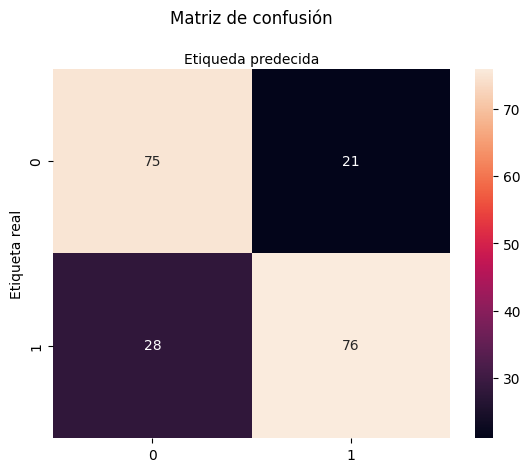

In [ ]:
import seaborn as sns

nombres_clases = [0,1]
fig, ax = plt.subplots()
marcas = np.arange(len(nombres_clases))
plt.xticks(marcas, nombres_clases)
plt.yticks(marcas, nombres_clases)

sns.heatmap(pd.DataFrame(matriz_confusion), annot=True, fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueda predecida')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train1, X_test1, y_train1, y_test1 = train_test_split(transformado, y, random_state=0, test_size = .2)




In [ ]:
n_n = 20
knn = KNeighborsClassifier(n_n)
knn.fit(X_train1, y_train1)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.81


In [ ]:
pred = knn.predict(X_test1)
matriz_knn = metrics.confusion_matrix(y_test1, pred)
matriz_knn

array([[77, 19],
       [19, 85]])

Text(0.5, 69.7222222222222, 'Etiqueda predecida')

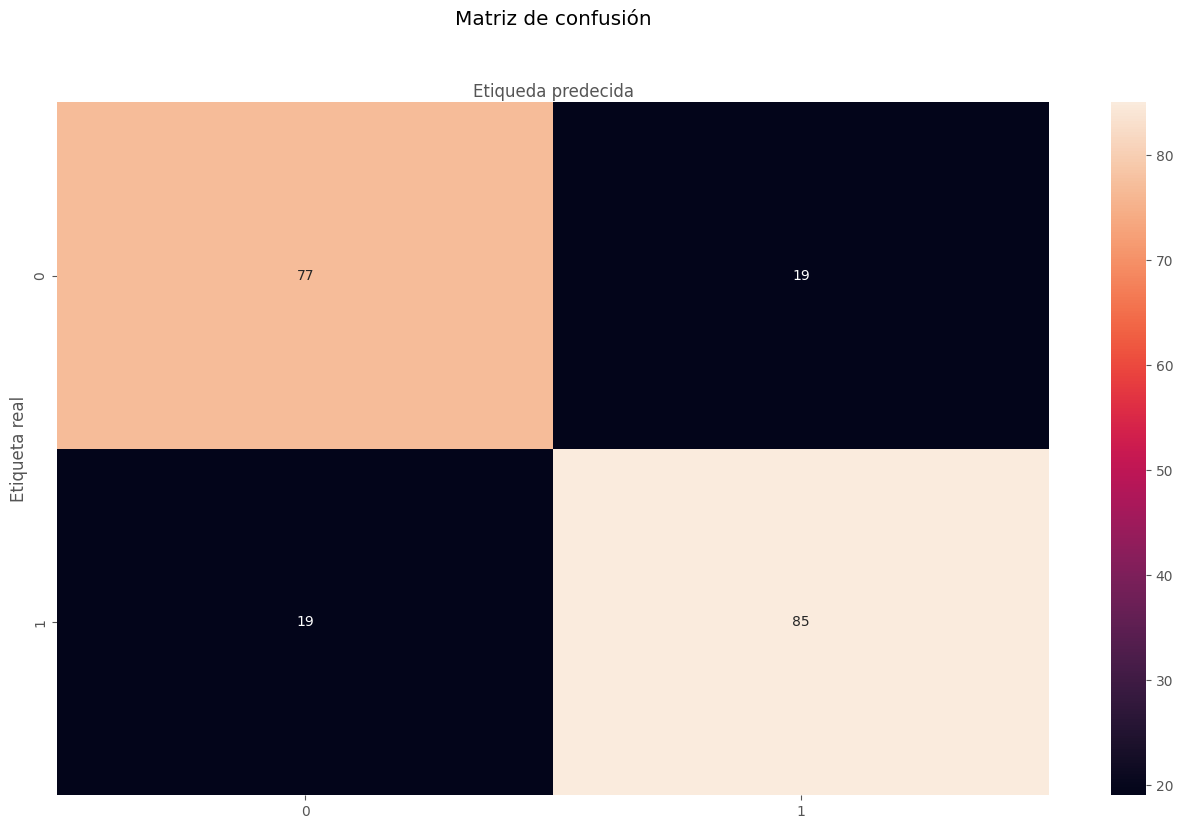

In [ ]:
nombres_clases = [0,1]
fig, ax = plt.subplots()
marcas = np.arange(len(nombres_clases))
plt.xticks(marcas, nombres_clases)
plt.yticks(marcas, nombres_clases)

sns.heatmap(pd.DataFrame(matriz_knn), annot=True, fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueda predecida')

([<matplotlib.axis.XTick at 0x7fc919ee35b0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50')])

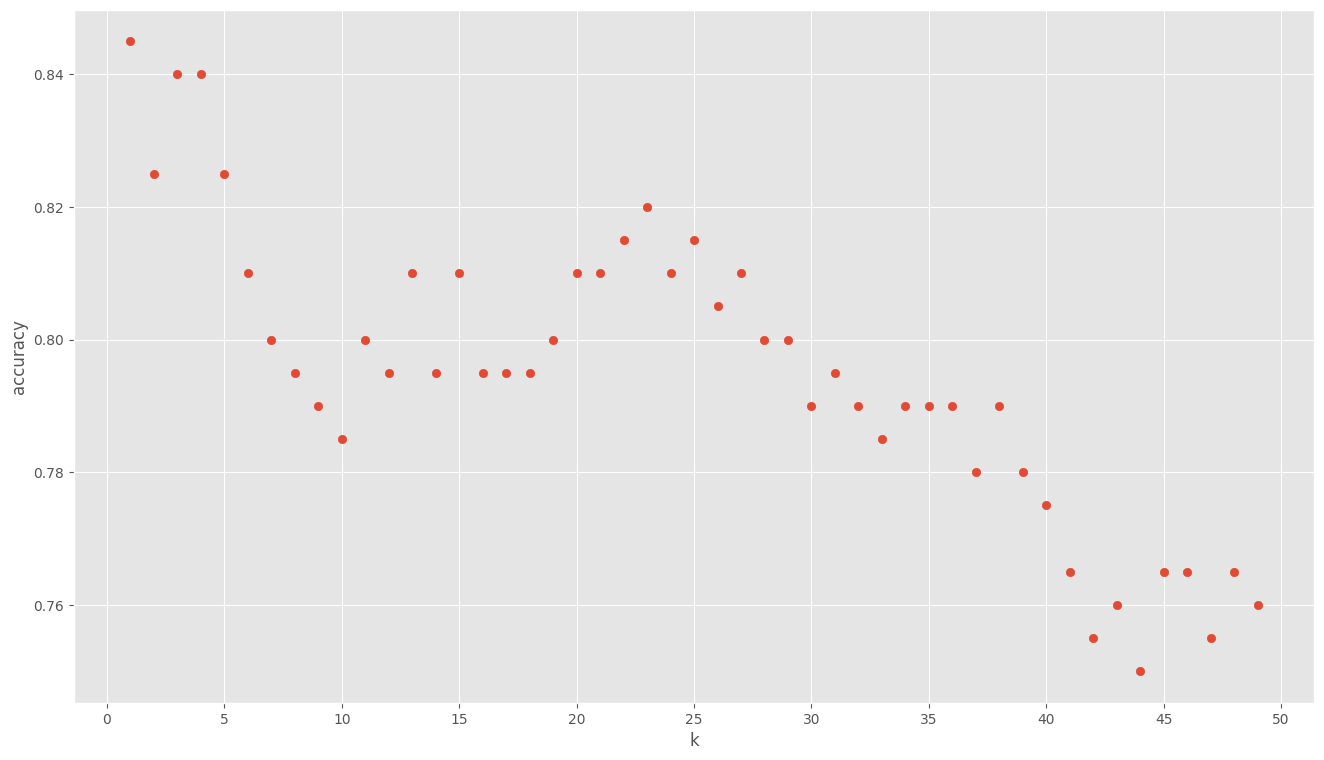

In [ ]:
k_range = range(1, 50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train1)
    scores.append(knn.score(X_test1, y_test1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])

In [ ]:
print(classification_report(y_test1, pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        96
           1       0.82      0.82      0.82       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

